In [60]:
# import dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder



In [61]:
# Get CVX stock data from Yahoo Finance
cvx = yf.Ticker("CVX")
cvx = cvx.history(start = '2019-01-01', end = '2022-05-06')
cvx.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,91.792434,95.503814,91.587198,94.657211,6384800,0.0,0
2019-01-03,94.973621,95.170309,92.416706,92.844284,6496200,0.0,0
2019-01-04,94.306609,94.913769,93.613935,94.768394,7952500,0.0,0
2019-01-07,94.973626,96.572770,93.998748,95.999817,5712700,0.0,0
2019-01-08,96.974688,97.308199,95.495266,95.580780,5674900,0.0,0


In [62]:
# Find number of trading days
cvx.shape

(843, 7)

<AxesSubplot:xlabel='Date'>

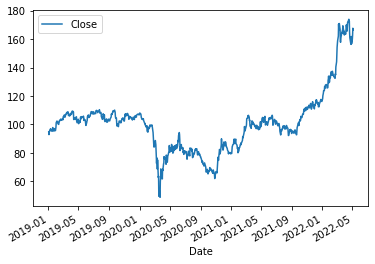

In [63]:
# plot the closing price data
cvx.plot.line(y="Close",use_index=True)

In [64]:
# get the close price
cvx_df = cvx[["Close"]]
cvx_df

,Close
Date,
2019-01-02,94.657211
2019-01-03,92.844284
2019-01-04,94.768394
2019-01-07,95.999817
2019-01-08,95.580780
...,...
2022-04-29,156.669998
2022-05-02,159.750000
2022-05-03,162.490005


In [65]:
# create a varibale to predict 'x' days out into the future
future_days = 30
# create a new column (target data) shifted 'x' days up
cvx_df['Predicition'] = cvx_df[['Close']].shift(-future_days)
cvx_df.head(10)                              

C:\Users\indyh\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Predicition
Date,,
2019-01-02,94.657211,102.060982
2019-01-03,92.844284,103.088844
2019-01-04,94.768394,103.054291
2019-01-07,95.999817,103.892136
2019-01-08,95.580780,102.907448
2019-01-09,96.863533,103.123375
2019-01-10,97.017441,103.322044
2019-01-11,96.239243,103.598457
2019-01-14,95.538017,103.719383


In [66]:
# create the feature data set(X)
X = np.array(cvx_df.drop(['Predicition'],1))[:-future_days]
print(X)

[[ 94.6572113 ]
 [ 92.84428406]
 [ 94.76839447]
 [ 95.99981689]
 [ 95.58078003]
 [ 96.86353302]
 [ 97.0174408 ]
 [ 96.23924255]
 [ 95.53801727]
 [ 95.88010406]
 [ 95.26438141]
 [ 95.74327087]
 [ 97.80419159]
 [ 96.06822968]
 [ 95.25582886]
 [ 97.0687561 ]
 [ 96.82076263]
 [ 95.92285919]
 [ 95.63208771]
 [ 96.64117432]
 [ 98.04362488]
 [101.22481537]
 [102.3963623 ]
 [102.17404938]
 [101.66092682]
 [101.10509491]
 [100.54924774]
 [100.01049042]
 [101.52411652]
 [102.25100708]
 [102.06098175]
 [103.0888443 ]
 [103.05429077]
 [103.89213562]
 [102.90744781]
 [103.12337494]
 [103.32204437]
 [103.59845734]
 [103.71938324]
 [103.28749847]
 [105.40370178]
 [105.48143005]
 [106.49204254]
 [106.69931793]
 [105.32595062]
 [105.04956055]
 [106.77705383]
 [107.01891327]
 [107.68399811]
 [107.62353516]
 [108.23680115]
 [108.72912598]
 [108.21089935]
 [107.70128632]
 [108.71185303]
 [106.31926727]
 [106.14652252]
 [107.21757507]
 [106.06015778]
 [106.25881195]
 [106.3970108 ]
 [107.91721344]
 [107.90

C:\Users\indyh\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [67]:
# create target data set (y)
y = np.array(cvx_df['Predicition'])[:-future_days]
print(y)

[102.06098175 103.0888443  103.05429077 103.89213562 102.90744781
 103.12337494 103.32204437 103.59845734 103.71938324 103.28749847
 105.40370178 105.48143005 106.49204254 106.69931793 105.32595062
 105.04956055 106.77705383 107.01891327 107.68399811 107.62353516
 108.23680115 108.72912598 108.21089935 107.70128632 108.71185303
 106.31926727 106.14652252 107.21757507 106.06015778 106.25881195
 106.3970108  107.91721344 107.90856171 107.01026154 107.79628754
 109.19556427 109.42015076 108.43545532 108.39228058 108.82413483
 103.44297028 103.77119446 104.66087341 103.88348389 103.52935791
 105.29140472 105.39505768 102.16461945 101.83638763 101.145401
 101.68091583 103.70210266 101.75865936 100.52349854 101.2922287
 102.26828003 102.15597534 101.49089813 104.67814636 105.369133
 104.0303421  105.06684113 105.49871063 105.36786652 105.12363434
 105.40274811 105.83888245 105.16725922 102.81217194 103.54486084
 103.19596863 101.85269165 100.64026642  99.3057251  101.17234039
 102.31500244 1

In [68]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [69]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)